### Introduction

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |



In [1]:
import pandas as pd
import os
import zipfile
import numpy as np

In [2]:
def unzip(name):
    """
    this extracts all files from zip
    Arg:
        name(str): the zipped folder name
    Return:
        None
    """
    # specifying the zip file name 
    file_name = name
    # opening the zip file in READ mode 
    with zipfile.ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
        zip.printdir() 
        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 

In [25]:
# Extract all files from zip folder
zipfilename = "data.zip"
unzip(zipfilename)

File Name                                             Modified             Size
fruit/apples.xlsx                              2017-01-28 13:21:46        20092
fruit/apricots.xlsx                            2017-01-28 13:21:46        20002
fruit/bananas.xlsx                             2017-01-28 13:21:46        15819
fruit/berries_mixed.xlsx                       2017-01-28 13:22:00        14989
fruit/blackberries.xlsx                        2017-01-28 13:21:48        16379
fruit/blueberries.xlsx                         2017-01-28 13:21:48        17444
fruit/cantaloupe.xlsx                          2017-01-28 13:21:48        16988
fruit/cherries.xlsx                            2017-01-28 13:21:48        18319
fruit/cranberries.xlsx                         2017-01-28 13:21:50        14360
fruit/dates.xlsx                               2017-01-28 13:21:50        15189
fruit/figs.xlsx                                2017-01-28 13:21:50        15092
fruit/fruit_cocktail.xlsx               

In [185]:
def getFresh(folder):
    """
        this function gets all the fresh rows in a specified format

    Arg:
        folder(str): a folder name
    Return:
        all_fresh(dataframe): a dataframe that contains all fresh rows from all the files in the specified folder
    """
    folderpath = folder + "/"
    directory = os.fsencode(folderpath)
    # Creat empty list
    ls = []
    # Open each xlsx file
    for file in os.listdir(directory):
        # Get the filename
        filename = os.fsdecode(file)
        # Check if it is a excel file
        if filename.endswith(".xlsx"):
            # Combine folder and file names to be a system path
            filepath = folderpath + filename
            # Read the excel file and return a ordered dictionary
            orddict = pd.read_excel(filepath, sheet_name=None)
            items = orddict.items()
            for food, info in items:
                # get the boolean values to distingish fresh food from others
                bool_val = info[info.columns[0]].str.contains("Fresh") 
                # Convert all NaN values to false if there are missing values
                bool_val.fillna(False,inplace=True)
                # Check if there is any fresh food in the info
                if bool_val.any():
                    # return all rows that is fresh
                    result = info[bool_val].reset_index(drop=True)
                    result.rename(columns = {result.columns[0] :'form'}, inplace = True)
                    # Filter out the information we want since not all the files have the same amount of information
                    result = result.iloc[:,[0,1,3,4,6]]
                    # Add the food name
                    result.insert(loc=0, column = 'food', value = food.lower())
                    # Add the dataframe to the list
                    ls.append(result)
    # Concate the list of dataframes
    all_fresh = pd.concat(ls)
    # Reassign all the column names
    all_fresh.columns = ["food","form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]
    # Add the food type e.g fruit/vegetables
    all_fresh.insert(loc=0, column = 'type', value = folder)
    return all_fresh 


In [180]:
# Put the data folder name that we want to look for the excel files
folder = "fruit"
getFresh(folder)

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
0,fruit,tangerines,Fresh1,1.37796,0.74,0.407855,0.759471
0,fruit,oranges,Fresh1,1.03517,0.73,0.407855,0.578357
0,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
0,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
0,fruit,papaya,Fresh1,1.29801,0.62,0.308647,0.646174
0,fruit,raspberries,Fresh1,6.97581,0.96,0.31967,2.32287
0,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
0,fruit,peaches,Fresh1,1.59119,0.96,0.341717,0.56639
0,fruit,plums,Fresh1,1.82742,0.94,0.363763,0.707176


__2.__ extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

In [186]:
getFresh("vegetables")

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,turnip greens,Fresh1,2.47175,0.75,0.31967,1.05353
0,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
0,vegetables,acorn squash,Fresh1,1.17225,0.458554,0.451948,1.15536
0,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
0,vegetables,cucumbers,"Fresh, consumed with peel1",1.29593,0.97,0.264555,0.353448
1,vegetables,cucumbers,"Fresh, peeled1",1.29593,0.73,0.264555,0.46965
0,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262
0,vegetables,corn,Fresh1,2.69062,0.54,0.363763,1.8125
0,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
0,vegetables,collard greens,Fresh1,2.63084,1.16,0.286601,0.650001


__3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [203]:
# Get the dataframes
df_fruit = getFresh("fruit")
df_veg = getFresh("vegetables")
# Remove all rows that don't have price in vegetable data
new_veg = df_veg.dropna(how='any', subset=['price_per_lb', 'price_per_cup'])
# Concate both dataframes
combined = pd.concat([df_fruit, new_veg])
# Check the data types of all the columns
print("--------BEFORE----------")
print(combined.dtypes)
# Change all relevant values to numeric
combined = combined.astype({'price_per_lb':'float64', 'yield':'float64','lb_per_cup':'float64', 'price_per_cup': 'float64'})
print("--------AFTER----------")
print(combined.dtypes)
combined

--------BEFORE----------
type             object
food             object
form             object
price_per_lb     object
yield            object
lb_per_cup       object
price_per_cup    object
dtype: object
--------AFTER----------
type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,cherries,Fresh1,3.592990,0.920000,0.341717,1.334548
0,fruit,tangerines,Fresh1,1.377962,0.740000,0.407855,0.759471
0,fruit,oranges,Fresh1,1.035173,0.730000,0.407855,0.578357
0,fruit,blackberries,Fresh1,5.774708,0.960000,0.319670,1.922919
0,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102
0,fruit,papaya,Fresh1,1.298012,0.620000,0.308647,0.646174
0,fruit,raspberries,Fresh1,6.975811,0.960000,0.319670,2.322874
0,fruit,pineapple,Fresh1,0.627662,0.510000,0.363763,0.447686
0,fruit,peaches,Fresh1,1.591187,0.960000,0.341717,0.566390
0,fruit,plums,Fresh1,1.827416,0.940000,0.363763,0.707176


* From plot 1, we can see that raspberries is the most expensive per pound and the watemelon is the least expensive.
* From plot 2, we see that the price distribution for vegetable is more normal compared to that of the price for fruit. We see that there are a number of fruits standing out and the interesting part is that they are all berries. 
* We see that potatos are the best among all as it is the cheapest and it can fill your stomach easily. I would be inclined to buy potatos as a college students.
* From plot 3, we see a surprising pattern, a positive correlation between yield and price per pound. The higher yield rate, the higher price per pound it is in general for the food. This is surprising because it is counter-intuitive. I thought higher yield rate usually results in lower price.
* There are many different types of nutrition. If we only look at the sum of all nutrients by using their quantity measures and divde that by price per pound, and take another sum of all nutrients divded by the yield, and take the average of these two sums, then maybe cabbage will give the best combination of price, yield, and nutrition. It is because cabbage has a high yield rate as shown by plot 4, and it is pretty cheap. 

In [239]:
import plotnine as p9

### Plot 1

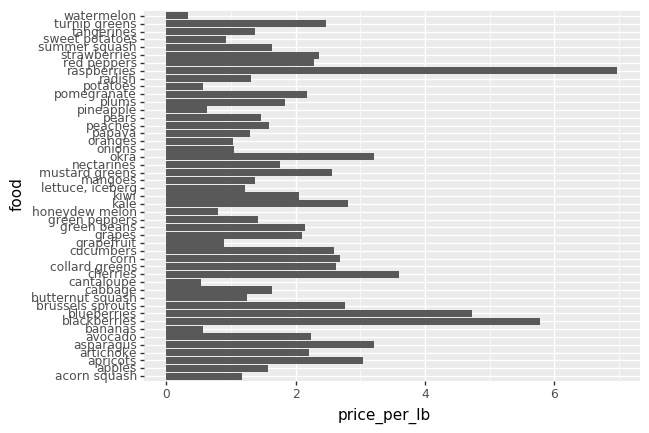

<ggplot: (307026254)>

In [252]:
# Visualize the the line
gg = p9.ggplot(combined)
# Number of cars in each class:
gg += p9.aes(x = 'food', y = 'price_per_lb')
gg += p9.geom_bar(stat="identity")
gg += p9.coord_flip()
#gg += p9.theme(axis_text_x= p9.element_text(angle=45, hjust=1 , margin={'r':-20}))
gg

### Plot 2

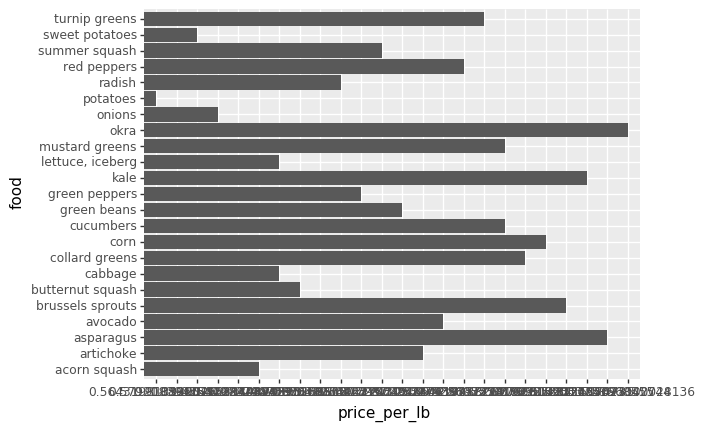

<ggplot: (307325595)>

In [261]:
# Visualize the the line
gg = p9.ggplot(new_veg)
# Number of cars in each class:
gg += p9.aes(x = 'food', y = 'price_per_lb')
gg += p9.geom_bar(stat="identity")
gg += p9.coord_flip()
#gg += p9.theme(axis_text_x= p9.element_text(angle=45, hjust=1 , margin={'r':-20}))
gg

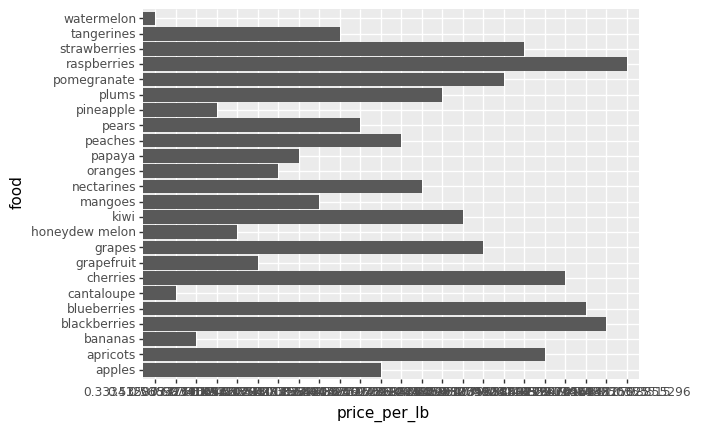

<ggplot: (307505686)>

In [262]:
# Visualize the the line
gg = p9.ggplot(df_fruit)
# Number of cars in each class:
gg += p9.aes(x = 'food', y = 'price_per_lb')
gg += p9.geom_bar(stat="identity")
gg += p9.coord_flip()
#gg += p9.theme(axis_text_x= p9.element_text(angle=45, hjust=1 , margin={'r':-20}))
gg

### Plot 3

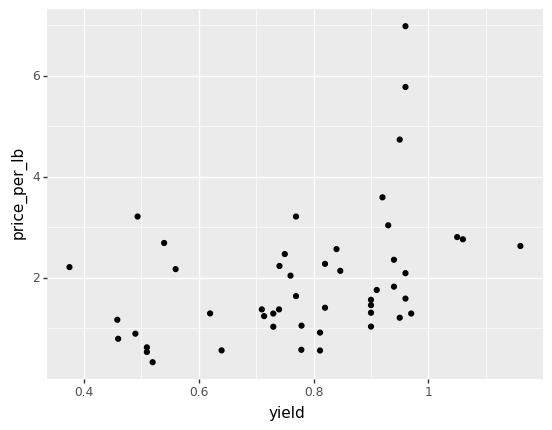

<ggplot: (309305997)>

In [263]:
## the same with Plotnine
gg = p9.ggplot(combined) # set data, start default layer
gg += p9.aes(x='yield',y='price_per_lb') # add aesthetic mappings
gg += p9.geom_point() # add point geom
gg

### Plot 4

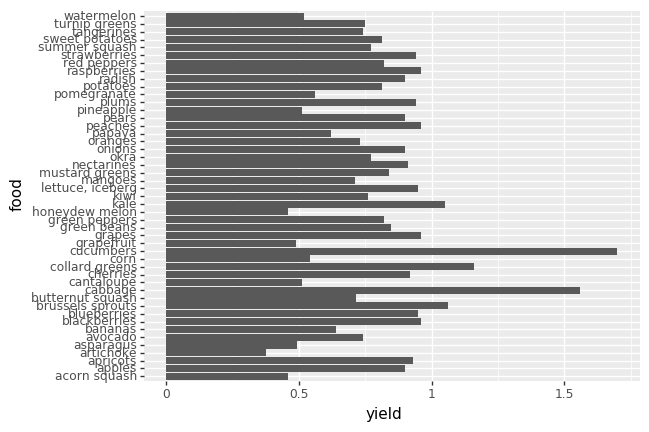

<ggplot: (-9223372036547254335)>

In [264]:
# Visualize the the line
gg = p9.ggplot(combined)
# Number of cars in each class:
gg += p9.aes(x = 'food', y = 'yield')
gg += p9.geom_bar(stat="identity")
gg += p9.coord_flip()
#gg += p9.theme(axis_text_x= p9.element_text(angle=45, hjust=1 , margin={'r':-20}))
gg